### Zalando Case

In [69]:
from numpy import mean
from numpy import std
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [70]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [71]:
trainX.shape

(60000, 28, 28)

In [72]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

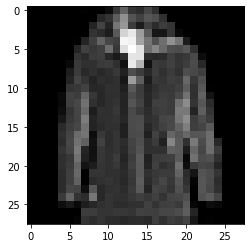

In [73]:
plt.imshow(trainX[19], cmap = 'gray')
plt.show()

In [74]:
img_coat = trainX[19]
type(img_coat)

numpy.ndarray

In [75]:
cv2.imwrite('Coat.png', img_coat)

True

In [76]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [77]:
trainY = to_categorical(trainY) # one-hot encoding 
testY = to_categorical(testY)

In [78]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [79]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
trainX, testX = train_norm, test_norm

In [80]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [81]:
model = define_model()
history = model.fit(trainX, trainY, epochs=15, batch_size=64, validation_data=(testX, testY), verbose=1)

Epoch 1/15
938/938 [==============================] - 21s 23ms/step - loss: 0.4548 - accuracy: 0.8384 - val_loss: 0.3587 - val_accuracy: 0.8703
Epoch 2/15
938/938 [==============================] - 20s 22ms/step - loss: 0.3149 - accuracy: 0.8868 - val_loss: 0.3183 - val_accuracy: 0.8828
Epoch 3/15
938/938 [==============================] - 19s 21ms/step - loss: 0.2703 - accuracy: 0.9028 - val_loss: 0.2821 - val_accuracy: 0.8987
Epoch 4/15
938/938 [==============================] - 19s 20ms/step - loss: 0.2421 - accuracy: 0.9127 - val_loss: 0.2790 - val_accuracy: 0.8975
Epoch 5/15
938/938 [==============================] - 18s 19ms/step - loss: 0.2202 - accuracy: 0.9197 - val_loss: 0.2710 - val_accuracy: 0.9018
Epoch 6/15
938/938 [==============================] - 18s 19ms/step - loss: 0.2013 - accuracy: 0.9270 - val_loss: 0.2683 - val_accuracy: 0.9013
Epoch 7/15
938/938 [==============================] - 18s 19ms/step - loss: 0.1859 - accuracy: 0.9320 - val_loss: 0.2648 - val_accuracy:

### Print the loss for every class

In [31]:
print(history.history['loss'][0])

0.41861024498939514


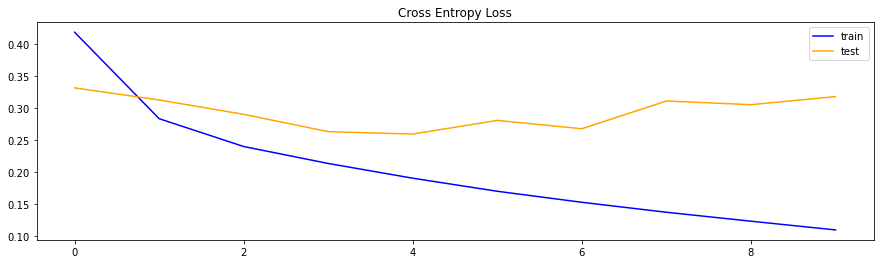

In [32]:
plt.figure(figsize= (15, 4))
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()
plt.show()

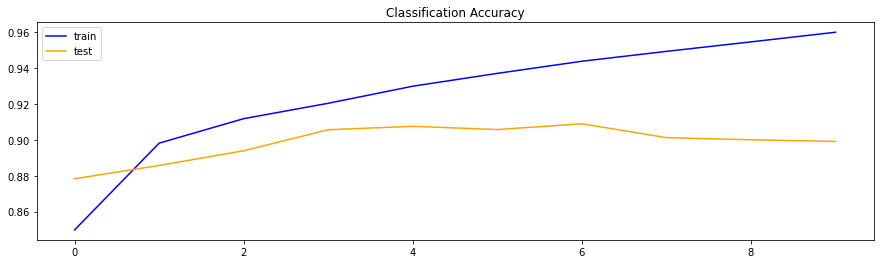

In [33]:
plt.figure(figsize= (15, 4))
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()
plt.show()

### Make predictions

In [37]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

def load_image(filename):
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    return img

In [64]:
img2pred = load_image("Bag2.png")

In [65]:
result = model.predict(img2pred)
result

array([[4.4372687e-04, 1.0087871e-04, 1.7349092e-02, 1.8984516e-04,
        4.3643247e-02, 5.0911301e-01, 7.1876857e-05, 3.5127604e-04,
        4.2873269e-01, 4.3962445e-06]], dtype=float32)

In [66]:
for i in result:
    
    print(np.around(i))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Save the model

In [67]:
model.save('zalando_predictions.h5')